Learn to compute basic features such as number of words, number of characters, average word length and number of special characters (such as Twitter hashtags and mentions). You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text.

# Data format for ML algorithms
- Excellent! This dataframe has numerical training features and the predictor variable is a class. Therefore, it is in a suitable format for applying a classification algorithm.

# One-hot encoding

In the previous exercise, we encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert df1 into a format that is suitable for machine learning.

- Great job! You have successfully performed one-hot encoding on this dataframe. Notice how the feature 5 (which represents sex) gets converted to two features feature 5_male and feature 5_female. With one-hot encoding performed, df1 only contains numerical features and can now be fed into any standard ML model!

# Basic feature extraction

## Character count of Russian tweets

In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

In [6]:
tweets = pd.read_csv('../datasets/russian_tweets.csv')

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


Great job! Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

## Word count of TED talks

ted is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in ted.

In order to complete this task, you will need to define a function count_words that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the transcript feature of ted to create the new feature word_count and compute its mean.

In [7]:
ted = pd.read_csv('../datasets/ted.csv')

# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


Amazing work! You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.

## Hashtags and mentions in Russian tweets

Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions count_hashtags() and count_mentions() respectively and applying them to the content feature of tweets.

In case you don't recall, the tweets are contained in the content feature of tweets.

In [9]:
import matplotlib.pyplot as plt

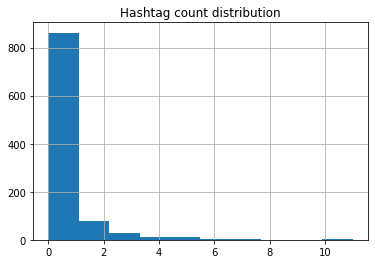

In [10]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

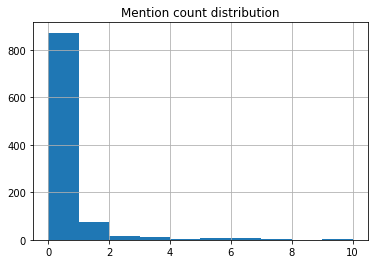

In [11]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

Excellent work! You now have a good grasp of how to compute various types of summary features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts.

# Readability tests
## Readability of 'The Myth of Sisyphus'

In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as sisyphus_essay.


In [27]:
# Import Textatistic
from textatistic import Textatistic

file = open('../datasets/sisyphus_essay.txt','r', encoding ='utf-8')
sisyphus_essay = file.read()

# Compute the readability scores
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


Excellent! You now know to compute the Flesch reading ease score for a given body of text. Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.

## Readability of various publications

In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

- `forbes`- An excerpt from an article from Forbes magazine on the Chinese social credit score system.
- `harvard_law`- An excerpt from a book review published in Harvard Law Review.
- `r_digest`- An excerpt from a Reader's Digest article on flight turbulence.
- `time_kids` - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

Great job! You are now adept at computing readability scores for various pieces of text. Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students

# Tokenization and Lemmatization

## Tokenizing the Gettysburg Address

In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the American Civil War.

The entire speech is available as a string named gettysburg.

In [30]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
file = open('../datasets/gettysburg.txt','r', encoding ='utf-8')
gettysburg = file.read()
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

Excellent work! You now know how to tokenize a piece of text. In the next exercise, we will perform similar steps and conduct lemmatization.

## Lemmatizing the Gettysburg address

In this exercise, we will perform lemmatization on the same gettysburg address from before.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjudge the kind of changes that take place to make the piece more machine friendly.

In [31]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago -PRON- father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now -PRON- be engage in a great civil war , test whether that nation , or any nation so conceived and so dedicated , can long endure . -PRON- be meet on a great battlefield of that war . -PRON- have come to dedicate a portion of that field , as a final resting place for those who here give -PRON- life that that nation might live . -PRON- be altogether fitting and proper that -PRON- should do this . but , in a large sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate -PRON- , far above -PRON- poor power to add or detract . the world will little note , nor long remember what -PRON- say here , but -PRON- can never forget what -PRON- do here . -PRON- be for -PRON- the living , rather , to be dedicate 

Excellent! You're now proficient at performing lemmatization using spaCy. Observe the lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process.

# Text cleaning

## Cleaning a blog post


Exercise
Exercise
Cleaning a blog post

In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string blog and has been printed to the console. The list of stopwords are available as stopwords.

Instructions
100 XP
Using list comprehension, loop through doc to extract the lemma_ of each token.
Remove stopwords and non-alphabetic tokens using stopwords and isalpha().

Take Hint (-30 XP)

 +100 XP
Great job! Take a look at the cleaned text; it is lowercased and devoid of numbers, punctuations and commonly used stopwords. Also, note that the word U.S. was present in the original text. Since it had periods in between, our text cleaning process completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of isalpha() for more nuanced cases.

In [34]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')

file = open('../datasets/blog.txt','r', encoding ='utf-8')
blog = file.read()
doc = nlp(blog)

# Import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = STOP_WORDS

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


## Cleaning TED talks in a dataframe

In this exercise, we will revisit the TED Talks from the first chapter. You have been a given a dataframe ted consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as stopwords.

Instructions
100 XP
Generate the Doc object for text. Ignore the disable argument for now.
Generate lemmas using list comprehension using the lemma_ attribute.
Remove non-alphabetic characters using isalpha() in the if condition.

In [ ]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

Excellent job! You have preprocessed all the TED talk transcripts contained in ted and it is now in a good shape to perform operations such as vectorization (as we will soon see how). You now have a good understanding of how text preprocessing works and why it is important. In the next lessons, we will move on to generating word level features for our texts.